# **03 Machine Learning Using Regression Models**

Models: [`Linear Regression`](https://en.wikipedia.org/wiki/Linear_regression), [`Lasso Regression`](https://en.wikipedia.org/wiki/Lasso_(statistics)), [`Ridge Regression`](https://en.wikipedia.org/wiki/Ridge_regression), [`Elastic Net`](https://en.wikipedia.org/wiki/Elastic_net_regularization), [`Huber Regressor`](https://en.wikipedia.org/wiki/Huber_loss)




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib 
import sklearn

###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [14, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

In [2]:
# Import the treated dataset
df = pd.read_excel("DataAccess\datasets\dataset_tvi_final.xlsx", parse_dates=True)
df

,Data,Canal,Programa,Tipo1,Tipo2,Hora Início,Hora Fim,Duração,Dia Semana,Apresentador/Pivot,...,MARTA CARDOSO,NUNO EIRO,Ninguem,PEDRO BENEVIDES,PEDRO BENEVIDES/SARA PINTO,PEDRO TEIXEIRA,RICARDO NUNES,SANDRA FELGUEIRAS,SOUSA MARTINS,VARIOS
0,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
1,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
3,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
4,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,2024-12-31,TVI,SECRET STORY - O VENCEDOR,DIVERTIMENTO,REALITY-SHOW,00:06:31,00:50:59,2668,Terça,CRISTINA FERREIRA,...,0,0,0,0,0,0,0,0,0,0
11541,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0
11542,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0
11543,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0


In [3]:
# Convert the date column into datetime format
df['Data'] = df['Data'].astype(str)  # Convert in string
df['Data'] = pd.to_datetime(df['Data'], format= f'%Y-%m-%d')

# Concatenate 'Data' with 'Hora início'
df['timestamp'] = pd.to_datetime(df['Data'].astype(str) + ' ' + df['Hora Início'])

# Set timestamp as index
df = df.set_index(['timestamp'])
df

,Data,Canal,Programa,Tipo1,Tipo2,Hora Início,Hora Fim,Duração,Dia Semana,Apresentador/Pivot,...,MARTA CARDOSO,NUNO EIRO,Ninguem,PEDRO BENEVIDES,PEDRO BENEVIDES/SARA PINTO,PEDRO TEIXEIRA,RICARDO NUNES,SANDRA FELGUEIRAS,SOUSA MARTINS,VARIOS
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 00:06:31,2024-12-31,TVI,SECRET STORY - O VENCEDOR,DIVERTIMENTO,REALITY-SHOW,00:06:31,00:50:59,2668,Terça,CRISTINA FERREIRA,...,0,0,0,0,0,0,0,0,0,0
2024-12-31 00:58:05,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0
2024-12-31 00:58:05,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Create a df with one-hot encoded "Programa" unique values
one_hot_prog = pd.get_dummies(df['Programa'], dtype = int)

# Concatenate the one-hot encoded Program column with the dataset
df = pd.concat([df, one_hot_prog], axis=1)
df

,Data,Canal,Programa,Tipo1,Tipo2,Hora Início,Hora Fim,Duração,Dia Semana,Apresentador/Pivot,...,SECRET STORY - ULTIMA HORA FIM DE SEMANA,SECRET STORY - VERDADE OU MENTIRA,SEDUÇAO (R),SOMOS PORTUGAL,SR. RUI,THE ART OF TASTING PORTUGAL,TODA A GENTE ME DIZ ISSO,TONY - SONHOS DE MENINO,TVI EXTRA,VAI OU RACHA
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
2024-01-01 00:14:10,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242,Segunda,Ninguem,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 00:06:31,2024-12-31,TVI,SECRET STORY - O VENCEDOR,DIVERTIMENTO,REALITY-SHOW,00:06:31,00:50:59,2668,Terça,CRISTINA FERREIRA,...,0,0,0,0,0,0,0,0,0,0
2024-12-31 00:58:05,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,0,0,0,0,1
2024-12-31 00:58:05,2024-12-31,TVI,VAI OU RACHA,DIVERTIMENTO,CONCURSOS,00:58:05,01:48:27,3022,Terça,PEDRO TEIXEIRA,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Remove duplicate labels before resampling
df = df[~df.index.duplicated(keep='first')]

# Resampling the time series in 15 min periods
df_resampled = df.groupby('Canal').apply(lambda x: x.resample("15min").ffill())

# Removing the extra index created by groupby
df_resampled.index = df_resampled.index.droplevel(0)

# Interpolate the values to avoid repeated values
df_resampled = df_resampled.interpolate(method="ffill")

# Drop NAN rows
df_resampled = df_resampled.dropna()

df_resampled

,Data,Canal,Programa,Tipo1,Tipo2,Hora Início,Hora Fim,Duração,Dia Semana,Apresentador/Pivot,...,SECRET STORY - ULTIMA HORA FIM DE SEMANA,SECRET STORY - VERDADE OU MENTIRA,SEDUÇAO (R),SOMOS PORTUGAL,SR. RUI,THE ART OF TASTING PORTUGAL,TODA A GENTE ME DIZ ISSO,TONY - SONHOS DE MENINO,TVI EXTRA,VAI OU RACHA
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:15:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 00:30:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 00:45:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 01:00:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-01 01:15:00,2024-01-01,TVI,FILME DE SEGUNDA,FICÇÃO,FILME,00:14:10,02:14:52,7242.0,Segunda,Ninguem,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 23:45:00,2024-12-30,TVI,MORANGOS COM AÇUCAR,FICÇÃO,SÉRIE,23:28:00,00:24:26,3386.0,Segunda,Ninguem,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-31 00:00:00,2024-12-30,TVI,MORANGOS COM AÇUCAR,FICÇÃO,SÉRIE,23:28:00,00:24:26,3386.0,Segunda,Ninguem,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-12-31 00:15:00,2024-12-31,TVI,SECRET STORY - O VENCEDOR,DIVERTIMENTO,REALITY-SHOW,00:06:31,00:50:59,2668.0,Terça,CRISTINA FERREIRA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_resampled.columns

Index(['Data', 'Canal', 'Programa', 'Tipo1', 'Tipo2', 'Hora Início',
       'Hora Fim', 'Duração', 'Dia Semana', 'Apresentador/Pivot',
       ...
       'SECRET STORY - ULTIMA HORA FIM DE SEMANA',
       'SECRET STORY - VERDADE OU MENTIRA', 'SEDUÇAO (R)', 'SOMOS PORTUGAL',
       'SR. RUI', 'THE ART OF TASTING PORTUGAL', 'TODA A GENTE ME DIZ ISSO',
       'TONY - SONHOS DE MENINO', 'TVI EXTRA', 'VAI OU RACHA'],
      dtype='object', length=265)

## Models using all features ##

In [7]:
# Select X (features) and Y (target)
'''
Features: All features of the dataset (One-Hot encoded + Temporal)
Target: Universo rat%
'''

# Reference column
ref_col = 'Clusters rat'

# Reference column index
ref_idx = df_resampled.columns.get_loc(ref_col)

# Selected columns (Features) after the reference column
features = df_resampled.columns[ref_idx + 1:]

X = pd.concat([df_resampled[features], df_resampled['Duração']], axis=1)
y = df_resampled['Universo rat%']

In [8]:
X.columns

Index(['Hora Fim_sin', 'Hora Fim_cos', 'Hora Início_sin', 'Hora Início_cos',
       'tipo1_CULT.GERAL/CONHECIME', 'tipo1_DESPORTO', 'tipo1_DIVERTIMENTO',
       'tipo1_FICÇÃO', 'tipo1_INFORMAÇÃO', 'tipo1_PUBLICIDADE',
       ...
       'SECRET STORY - VERDADE OU MENTIRA', 'SEDUÇAO (R)', 'SOMOS PORTUGAL',
       'SR. RUI', 'THE ART OF TASTING PORTUGAL', 'TODA A GENTE ME DIZ ISSO',
       'TONY - SONHOS DE MENINO', 'TVI EXTRA', 'VAI OU RACHA', 'Duração'],
      dtype='object', length=253)

In [9]:
print(X.describe().T[['min', 'max']])

                                 min           max
Hora Fim_sin               -0.984503      0.705305
Hora Fim_cos                0.175367      1.000000
Hora Início_sin            -1.000000      0.659127
Hora Início_cos             0.000145      1.000000
tipo1_CULT.GERAL/CONHECIME  0.000000      1.000000
...                              ...           ...
TODA A GENTE ME DIZ ISSO    0.000000      1.000000
TONY - SONHOS DE MENINO     0.000000      1.000000
TVI EXTRA                   0.000000      1.000000
VAI OU RACHA                0.000000      1.000000
Duração                     3.000000  13085.000000

[253 rows x 2 columns]


## Data Split and parameters definition ##

In [10]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
# Find the best parameters for Lasso and ElasticNet

from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from numpy import array

# Indexes of numerical features and high cardinality categorical variables
dur_idx = X.columns.get_loc('Duração')
prog_idx_st = X.columns.get_loc('VARIOS') #The program starts after the "Varios"
prog_idx_end = X.columns.get_loc('VAI OU RACHA')
prog_idx_pca = list(range(prog_idx_st + 1, prog_idx_end+1))

# Preprocessing (Normalization and Dimensionality reduction)

# Duration normalization
scaler_dur = MinMaxScaler(feature_range=(-1, 1))
X_train['Duração'] = scaler_dur.fit_transform(array(X_train['Duração']).reshape(-1, 1))
X_test['Duração'] = scaler_dur.transform(array(X_test['Duração']).reshape(-1, 1))

# Apply PCA to Program One-Hot encoding block
components = 28 #optimal number of components
pca = PCA(n_components=components, random_state=42)
pca_columns = [f'Programa_pca_{i}' for i in range(components)]
X_train_pca = pca.fit_transform(X_train.iloc[:, prog_idx_st + 1 : prog_idx_end])
X_test_pca = pca.transform(X_test.iloc[:, prog_idx_st + 1 : prog_idx_end])

# Save the names of the original columns for the coefficients later
original_cols = X_train.columns.to_list()

# Remove the One-Hot encoded columns of the programs
reduced_cols = original_cols[:prog_idx_st+1] + original_cols[prog_idx_end:]

# Add PCA columns to the original columns for coefficients display
final_feature_names = reduced_cols + pca_columns

X_train_final = np.hstack([
np.delete(X_train.values, slice(prog_idx_st+1, prog_idx_end), axis=1),
X_train_pca
])
X_test_final = np.hstack([
    np.delete(X_test.values, slice(prog_idx_st+1, prog_idx_end), axis=1),
    X_test_pca
])

# Scale the target
scaler_rat = MinMaxScaler(feature_range=(-1, 1))
y_train_scaled = scaler_rat.fit_transform(array(y_train).reshape(-1, 1))

# Lasso
lasso_cv = LassoCV(alphas=np.logspace(-6, 1, 100), cv=5, random_state=42)
lasso_cv.fit(X_train_final, y_train_scaled.ravel())

print("Best alpha (Lasso):", lasso_cv.alpha_)

# ElasticNet
elastic_cv = ElasticNetCV(
    l1_ratio=[0.1, 0.2, 0.5, 0.8, 1.0],
    alphas=np.logspace(-6, 1, 100),
    cv=5,
    random_state=42
)
elastic_cv.fit(X_train_final, y_train_scaled.ravel())

print("Best alpha (ElasticNet):", elastic_cv.alpha_)
print("Best l1_ratio (ElasticNet):", elastic_cv.l1_ratio_)

Best alpha (Lasso): 5.857020818056661e-05
Best alpha (ElasticNet): 0.0002983647240283337
Best l1_ratio (ElasticNet): 0.1


## Choose the number of folds for cross-validation ##

In time series, the number of folds can vary between the models so we need to find the best folds for each model.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import(LinearRegression, 
                                 ElasticNet, 
                                 Ridge, 
                                 Lasso, 
                                 HuberRegressor)
from sklearn.metrics import make_scorer, mean_absolute_error as mae

# Models
lr_model_cv = LinearRegression()
en_model_cv = ElasticNet(alpha=0.000298, l1_ratio=0.1)
ridge_model_cv = Ridge()
lasso_model_cv = Lasso(alpha=5.857e-05)
hb_model_cv = HuberRegressor()

# Dictionary of the models for sensitivity analysis
models_cv = {
    'Linear Regression': lr_model_cv,
    'ElasticNet': en_model_cv,
    'Ridge': ridge_model_cv,
    'Lasso': lasso_model_cv,
    'Huber Regressor': hb_model_cv
    }

# Range of folds to test
fold_values = range(2, 21)  # 2 to 20 folds
cv_results = {name: {'mean': [], 'std': []} for name in models_cv}

# Indexes of numerical features and high cardinality categorical variables
dur_idx = X.columns.get_loc('Duração')
prog_idx_st = X.columns.get_loc('VARIOS') #The program starts after the "Varios"
prog_idx_end = X.columns.get_loc('VAI OU RACHA')
prog_idx_pca = list(range(prog_idx_st + 1, prog_idx_end+1))

for n in fold_values:
    tscv = TimeSeriesSplit(n_splits=n)

    for name, model in models_cv.items():
        fold_maes = []

        for train_idx, val_idx in tscv.split(X, y):
            # Split into train and validation sets for the cross-validation
            X_train, X_val = X.iloc[train_idx].copy(), X.iloc[val_idx].copy()
            y_train, y_val = y.iloc[train_idx].copy(), y.iloc[val_idx].copy()

            # 1. Convert the train and validation sets to numpy for data normalization and PCA
            X_train = X_train.to_numpy()
            X_val = X_val.to_numpy()
            y_train = y_train.to_numpy()
            y_val = y_val.to_numpy()

            # 2. Scale the duration (numerical feature)
            scaler_feat = MinMaxScaler(feature_range=(-1, 1))
            X_train[:, dur_idx] = scaler_feat.fit_transform(X_train[:, dur_idx].reshape(-1, 1)).ravel()
            X_val[:, dur_idx] = scaler_feat.transform(X_val[:, dur_idx].reshape(-1, 1)).ravel()

            # 3. Apply PCA to Program One-Hot encoding block
            pca = PCA(n_components=5) # optimal number of components
            X_train_pca = pca.fit_transform(X_train[:, prog_idx_pca])
            X_val_pca = pca.transform(X_val[:, prog_idx_pca])

            # 4. Replace the PCA block in X
            X_train = np.hstack([
                np.delete(X_train, prog_idx_pca, axis=1),
                X_train_pca
            ])
            X_val = np.hstack([
                np.delete(X_val, prog_idx_pca, axis=1),
                X_val_pca
            ])

            # 5. Scale the target
            scaler_target = MinMaxScaler(feature_range=(-1, 1))
            y_train_scaled = scaler_target.fit_transform(y_train.reshape(-1, 1)).ravel()

            # 6. Fit the model on the scaled target
            model.fit(X_train, y_train_scaled)

            # 7. Predict, denormalize, and compute MAE
            y_pred_scaled = model.predict(X_val)
            y_pred = scaler_target.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

            mae_val = mae(y_val, y_pred)
            fold_maes.append(mae_val)

        cv_results[name]['mean'].append(np.mean(fold_maes)) # Store the MAE mean of each fold for each model
        cv_results[name]['std'].append(np.std(fold_maes)) # Store the MAE std of each fold for each model

'for n in fold_values:\n    for name, model in models_cv.items():\n        tscv = TimeSeriesSplit(n_splits=n)\n        scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring=mae_scorer)\n        mean_score = -np.mean(scores)  # make positive again\n        std_score = np.std(-scores) # Make them positive\n        cv_results[name][\'mean\'].append(mean_score)\n        cv_results[name][\'std\'].append(std_score)\n        #cv_scores[name] = mean_score\n        #stds[name] = std_score\n        print(f"{n} folds for {name} → Mean MAE: {mean_score:.4f}; Std MAE: {std_score:.4f}")'

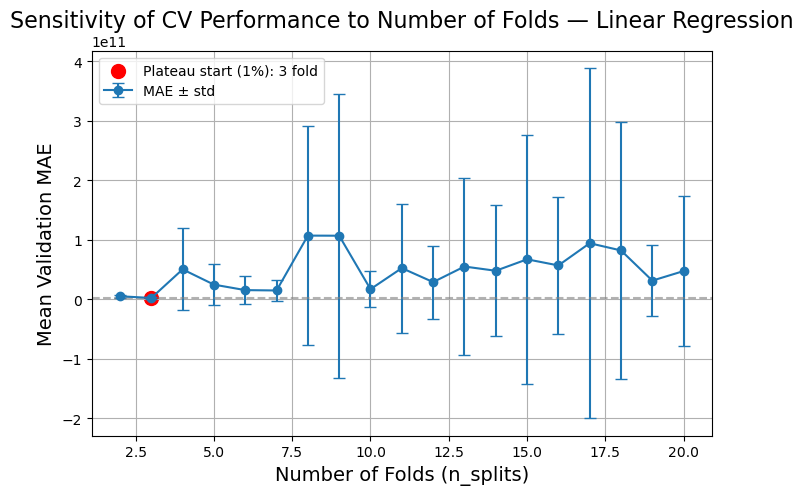

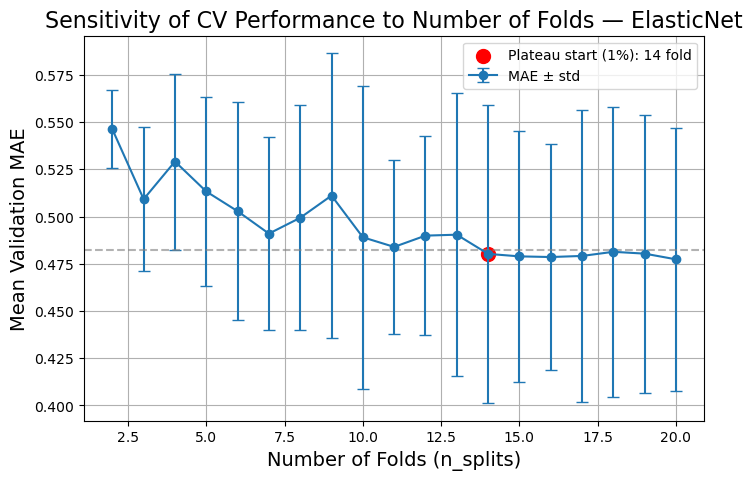

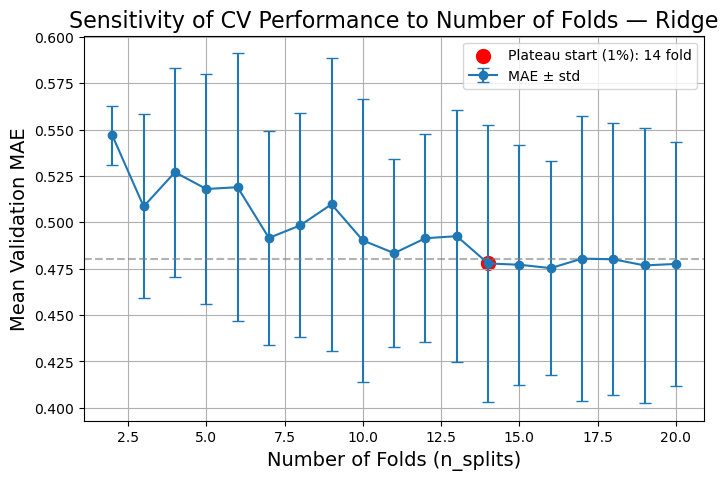

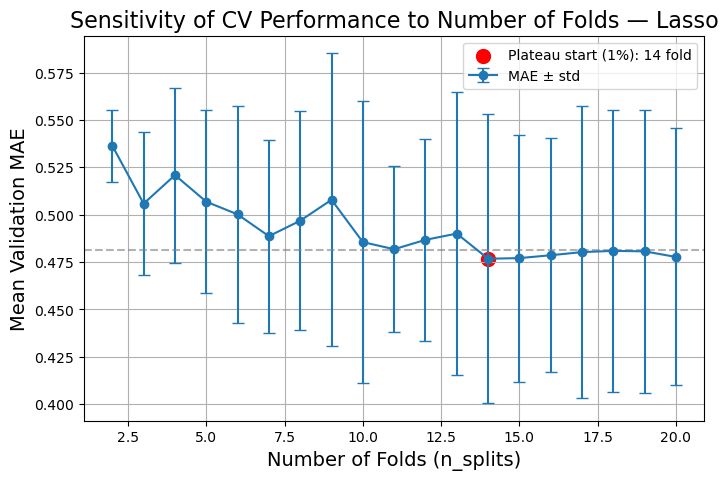

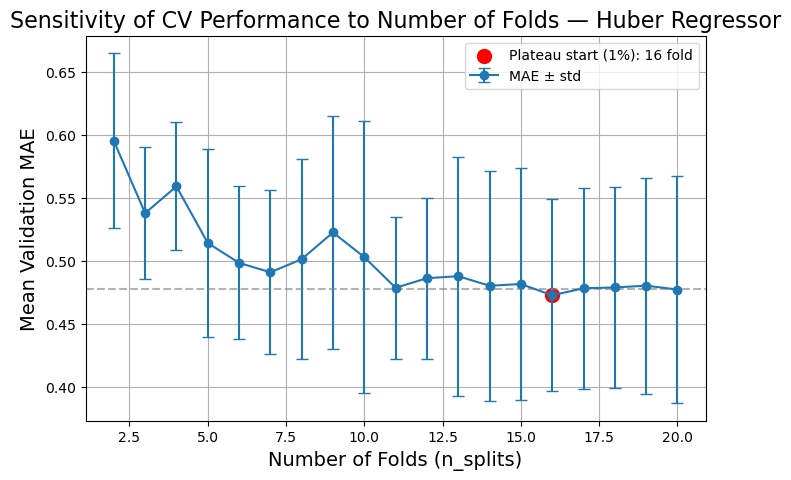

In [ ]:
# Define the tolerance when the model plateaus
tol = 0.01 # 1% tolerance

# Minimum consecutive folds with equal or less mean MAE variance than 1%
min_consecutive = 2

for name, data in cv_results.items():

    means = np.array(data['mean'])
    stds = np.array(data['std'])
    fold_values = np.array(fold_values)

    # Define the Plateau point based on the minimum consecutive folds with a MAE change of at max 1%
    min_mae = np.min(means)
    threshold = min_mae * (1 + tol)

    plateau_idx = None
    consecutive_count = 0

    for i in range(len(means)):
        if means[i] <= threshold:
            consecutive_count += 1
            if consecutive_count >= min_consecutive:
                plateau_idx = i - min_consecutive + 1  # Start of the plateau
                break
        else:
            consecutive_count = 0 # It resets if the condition fails

    # In case the previous conditions are not met, it retrieves the default answer
    if plateau_idx is None:
        if len(np.where(means <= threshold)[0]) > 0:
            plateau_idx = np.where(means <= threshold)[0][0] # First index meeting the tolerance
        else:
            0

    plt.figure(figsize=(8, 5))
    plt.errorbar(fold_values, means, yerr=stds, fmt='-o', capsize=4, label="MAE ± std")
    plt.scatter(fold_values[plateau_idx], means[plateau_idx], color='red', s=100, label=f"Plateau start (1%): {fold_values[plateau_idx]} fold")
    plt.axhline(y=threshold, color='gray', linestyle='--', alpha=0.6)
    plt.xlabel("Number of Folds (n_splits)")
    plt.ylabel("Mean Validation MAE")
    plt.title(f"Sensitivity of CV Performance to Number of Folds — {name}")
    plt.grid(True)
    plt.legend()
    plt.show()

## Forecast with all features with the Cross-validation ##

In [11]:
# Import important packages
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import(LinearRegression, 
                                 ElasticNet, 
                                 Ridge, 
                                 Lasso, 
                                 HuberRegressor)
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Models
lr_model = LinearRegression()
en_model = ElasticNet(alpha=0.000298, l1_ratio=0.1) # L1 penalty is 10% and L2 penalty is 90%
ridge_model = Ridge()
lasso_model = Lasso(alpha=5.857e-05)
hb_model = HuberRegressor()

# Create a dictionary with the models
models = {
    'Linear Regression': {'model': lr_model, 'n_splits': 2},
    'Lasso': {'model': lasso_model, 'n_splits': 14},
    'Ridge': {'model': ridge_model, 'n_splits': 14},
    'ElasticNet': {'model': en_model, 'n_splits': 14},
    'Huber Regressor': {'model': hb_model, 'n_splits': 16}
    }

# Indexes of numerical features and high cardinality categorical variables
dur_idx = X.columns.get_loc('Duração')
prog_idx_st = X.columns.get_loc('VARIOS') #The program starts after the "Varios"
prog_idx_end = X.columns.get_loc('VAI OU RACHA')
prog_idx_pca = list(range(prog_idx_st + 1, prog_idx_end+1))

# Final results storage
cv_results = {}        # Stores average CV metrics
final_test_results = {}  # Stores unbiased test set metrics
predictions = {}         # Stores final predictions
coefs = {}               # Model coefficients

for name, params in models.items():
    model = params['model']
    n_splits = params['n_splits']
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    fold_metrics = []

    # ---------- CROSS VALIDATION ----------
    for fold_idx, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # ---- Preprocessing per fold ----
        # Scale duration
        scaler_dur = MinMaxScaler(feature_range=(-1, 1))
        X_tr['Duração'] = scaler_dur.fit_transform(X_tr['Duração'].values.reshape(-1, 1))
        X_val['Duração'] = scaler_dur.transform(X_val['Duração'].values.reshape(-1, 1))

        # PCA for high-cardinality program features
        pca = PCA(n_components=22, random_state=42)
        X_tr_pca = pca.fit_transform(X_tr.iloc[:, prog_idx_st + 1:prog_idx_end])
        X_val_pca = pca.transform(X_val.iloc[:, prog_idx_st + 1:prog_idx_end])

        # Build final features
        X_tr_final = np.hstack([
            np.delete(X_tr.values, slice(prog_idx_st+1, prog_idx_end), axis=1),
            X_tr_pca
        ])
        X_val_final = np.hstack([
            np.delete(X_val.values, slice(prog_idx_st+1, prog_idx_end), axis=1),
            X_val_pca
        ])

        # Scale target inside the fold
        scaler_y = MinMaxScaler(feature_range=(-1, 1))
        y_tr_scaled = scaler_y.fit_transform(y_tr.values.reshape(-1, 1)).flatten()
        y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()

        # ---- Train and validate ----
        model.fit(X_tr_final, y_tr_scaled)
        y_val_pred_scaled = model.predict(X_val_final)
        y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).flatten()

        # ---- Compute fold metrics ----
        fold_metric = {
            'MAE': mean_absolute_error(y_val, y_val_pred),
            'MSE': mean_squared_error(y_val, y_val_pred),
            'R2': r2_score(y_val, y_val_pred),
            'Forecast Bias': np.mean(y_val_pred - y_val),
            'MAPE': mean_absolute_percentage_error(y_val, y_val_pred)
        }
        fold_metrics.append(fold_metric)

    # Average metrics across folds
    avg_fold_metrics = {m: np.mean([f[m] for f in fold_metrics]) for m in fold_metrics[0]}
    cv_results[name] = avg_fold_metrics


In [12]:
# Put CV results in a table
df_results = pd.DataFrame.from_dict(cv_results, orient='index')

# Reset index to show models as a column
df_results = df_results.reset_index().rename(columns={'index': 'Model'})

def smart_format(x):
    if abs(x) >= 1e3 or (abs(x) > 0 and abs(x) < 1e-5):
        return f"{x:.3e}"
    else:
        return f"{x:.6f}"

# Display results
print(df_results.to_string(float_format=smart_format))

               Model       MAE       MSE         R2  Forecast Bias      MAPE
0  Linear Regression 1.759e+10 5.754e+22 -7.407e+21     -6.615e+09 9.469e+09
1              Lasso  0.436696  0.540590   0.929815       0.100155  0.276344
2              Ridge  0.444645  0.543736   0.929230       0.100962  0.284104
3         ElasticNet  0.439880  0.532460   0.930784       0.103682  0.280539
4    Huber Regressor  0.428840  0.577309   0.925709       0.080140  0.254463


## Final model evaluation ##

In [9]:
# ---------- FINAL TRAINING ON FULL TRAIN + TEST ----------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Define a new preprocessing function for evaluation
def prep_eval (X, y):

    # Split the dataset with train_test_split to get only 2 datasets for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle= False)

    # Save y_test index for later visualization
    y_test_index = y_test.index

    # Preprocess full train + test
    scaler_dur_full = MinMaxScaler(feature_range=(-1, 1))
    X_train['Duração'] = scaler_dur_full.fit_transform(X_train['Duração'].values.reshape(-1, 1))
    X_test['Duração'] = scaler_dur_full.transform(X_test['Duração'].values.reshape(-1, 1))

    pca_full = PCA(n_components=22, random_state=42)
    X_train_pca_full = pca_full.fit_transform(X_train.iloc[:, prog_idx_st + 1:prog_idx_end])
    X_test_pca_full = pca_full.transform(X_test.iloc[:, prog_idx_st + 1:prog_idx_end])

    X_train_final = np.hstack([
        np.delete(X_train.values, slice(prog_idx_st+1, prog_idx_end), axis=1),
        X_train_pca_full
    ])
    X_test_final = np.hstack([
        np.delete(X_test.values, slice(prog_idx_st+1, prog_idx_end), axis=1),
        X_test_pca_full
    ])

    # Scale target for full training
    scaler_y_full = MinMaxScaler(feature_range=(-1, 1))
    y_train_scaled_full = scaler_y_full.fit_transform(y_train.values.reshape(-1, 1)).flatten()

    return X_train_final, y_train_scaled_full, X_test_final, y_test, scaler_y_full, y_test_index, X_train

In [10]:
# Import important packages
from sklearn.linear_model import(LinearRegression, 
                                 ElasticNet, 
                                 Ridge, 
                                 Lasso, 
                                 HuberRegressor)
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

# Models
lr_model = LinearRegression()
en_model = ElasticNet(alpha=0.000298, l1_ratio=0.1) # L1 penalty is 80% and L2 penalty is 20%
ridge_model = Ridge()
lasso_model = Lasso(alpha=5.857e-05)
hb_model = HuberRegressor()

# Create a dictionary with the models
models = {
    'Linear Regression': lr_model, 
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': en_model,
    'Huber Regressor': hb_model
    }

# Indexes of numerical features and high cardinality categorical variables
dur_idx = X.columns.get_loc('Duração')
prog_idx_st = X.columns.get_loc('VARIOS') #The program starts after the "Varios"
prog_idx_end = X.columns.get_loc('VAI OU RACHA')
prog_idx_pca = list(range(prog_idx_st + 1, prog_idx_end+1))

# Empty dictionaries to store the final metrics and coefficients
coefs = {}
final_test_results = {}
predictions = {}

X_train_final, y_train_scaled_full, X_test_final, y_test, scaler_y_full, y_test_index, X_train = prep_eval(X, y)

for name, model in models.items():
    # Train on full train
    model.fit(X_train_final, y_train_scaled_full)

    # Predict on test set
    y_test_pred_scaled = model.predict(X_test_final)
    y_test_pred = scaler_y_full.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

    # Store predictions
    predictions[name] = y_test_pred

    # Compute unbiased test metrics
    test_metrics = {
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'R2': r2_score(y_test, y_test_pred),
        'Forecast Bias': np.mean(y_test_pred - y_test),
        'MAPE': mean_absolute_percentage_error(y_test, y_test_pred)
    }
    final_test_results[name] = test_metrics

    # Save coefficients
    original_cols = X_train.columns[:prog_idx_st+1].to_list() + X_train.columns[prog_idx_end:].to_list()
    pca_cols = [f"PCA_{i+1}" for i in range(22)]
    final_feature_names = original_cols + pca_cols
    coefs[name] = dict(zip(final_feature_names, model.coef_.flatten()))

## Metrics and Coefficients ##

In [11]:
# Create DataFrame with models as rows and features as columns
coef_df = pd.DataFrame(coefs).T

# Optional: sort columns alphabetically or keep original order
coef_df = coef_df[final_feature_names]

# Display nicely
print(coef_df.head())

                   Hora Fim_sin  Hora Fim_cos  Hora Início_sin  \
Linear Regression     -0.302782      0.419347        -0.226355   
Lasso                 -0.353782      0.535079        -0.174319   
Ridge                 -0.299579      0.419507        -0.229913   
ElasticNet            -0.310202      0.457263        -0.218154   
Huber Regressor       -0.245774      0.396222        -0.199514   

                   Hora Início_cos  tipo1_CULT.GERAL/CONHECIME  \
Linear Regression         0.161586               -8.438346e+11   
Lasso                     0.098692                0.000000e+00   
Ridge                     0.160645               -4.991636e-02   
ElasticNet                0.135348               -5.463850e-03   
Huber Regressor          -0.046762               -1.325103e-01   

                   tipo1_DESPORTO  tipo1_DIVERTIMENTO  tipo1_FICÇÃO  \
Linear Regression    4.577417e+10       -3.054126e+10  6.944339e+11   
Lasso                5.166708e-05       -0.000000e+00  0.000000e

In [20]:
np.count_nonzero(lasso_model.coef_), np.count_nonzero(en_model.coef_), np.count_nonzero(ridge_model.coef_), np.count_nonzero(hb_model.coef_)

(60, 73, 104, 104)

In [13]:
#-------------- Features with non-zero coefficients for Elastic Net ------------------------------
non_zero_en_feat = []

for feat, coef in coefs['ElasticNet'].items():
    if abs(coef) > 0.0:
        non_zero_en_feat.append(feat)

print("Features with non-zero coefficients for ElasticNet", non_zero_en_feat)

#-------------- Features with non-zero coefficients for Lasso ------------------------------
non_zero_lasso_feat = []

for feat, coef in coefs['Lasso'].items():
    if abs(coef) > 0.0:
        non_zero_lasso_feat.append(feat)

print("Features with non-zero coefficients for Lasso", non_zero_lasso_feat)

Features with non-zero coefficients for ElasticNet ['Hora Fim_sin', 'Hora Fim_cos', 'Hora Início_sin', 'Hora Início_cos', 'tipo1_CULT.GERAL/CONHECIME', 'tipo1_DESPORTO', 'tipo1_DIVERTIMENTO', 'tipo2_CONCURSOS', 'tipo2_FILME', 'tipo2_GALAS', 'tipo2_HUMOR', 'tipo2_INF.DESPORTIVA', 'tipo2_MAGAZINES', 'tipo2_MINI-SÉRIE', 'tipo2_PROGRAMAS POLÍTICOS', 'tipo2_REALITY-SHOW', 'tipo2_SÉRIE', 'tipo2_TALK-SHOWS', 'tipo2_TELENOVELA', 'tipo2_TRANSMISSÃO DESPORTO', 'Domingo', 'Quarta', 'Segunda', 'Sexta', 'Sábado', 'Terça', 'ALICE ALVES', 'ANDREIA VALE', 'ANDREIA VALE/PEDRO BENEVIDES', 'BRUNO CABRERIZO/CRISTINA FERREIRA', 'CARLOS MENDES/MAFALDA VEIGA', 'CLAUDIO RAMOS', 'CLAUDIO RAMOS/MANUEL LUIS GOUCHA', 'CRISTINA FERREIRA', 'FLAVIO FURTADO', 'IVA DOMINGUES', 'JOAO PATRICIO', 'JOSE ALBERTO CARVALHO', 'JOSE ALBERTO CARVALHO/SANDRA FELGUEIRAS', 'JOSE ALBERTO CARVALHO/SANDRA FELGUEIRAS/SARA PINTO', 'MAFALDA CASTRO', 'MAFALDA VEIGA', 'MANUEL LUIS GOUCHA', 'MARIA BOTELHO-MONIZ', 'MARIA CERQUEIRA GOMES/RUI

In [18]:
dif_feats = []

for en_feat in non_zero_en_feat:
    if en_feat not in non_zero_lasso_feat:
        dif_feats.append(en_feat)

print(dif_feats)

['tipo1_CULT.GERAL/CONHECIME', 'tipo1_DIVERTIMENTO', 'tipo2_GALAS', 'tipo2_HUMOR', 'tipo2_INF.DESPORTIVA', 'tipo2_MAGAZINES', 'CARLOS MENDES/MAFALDA VEIGA', 'FLAVIO FURTADO', 'MARIA BOTELHO-MONIZ', 'NUNO EIRO', 'RICARDO NUNES', 'SANDRA FELGUEIRAS', 'PCA_3', 'PCA_14']


In [19]:
for feat, coef in coefs['ElasticNet'].items():
    if feat in dif_feats:
        print(f"{feat} ElasticNet coefficient = {coef}")

tipo1_CULT.GERAL/CONHECIME ElasticNet coefficient = -0.005463850303286263
tipo1_DIVERTIMENTO ElasticNet coefficient = -0.03144534742756091
tipo2_GALAS ElasticNet coefficient = 0.08924711127519583
tipo2_HUMOR ElasticNet coefficient = -0.01752580417735483
tipo2_INF.DESPORTIVA ElasticNet coefficient = -0.13033228267356287
tipo2_MAGAZINES ElasticNet coefficient = -0.0066084567003791336
CARLOS MENDES/MAFALDA VEIGA ElasticNet coefficient = -0.0012910978577253887
FLAVIO FURTADO ElasticNet coefficient = -0.023133702573634105
MARIA BOTELHO-MONIZ ElasticNet coefficient = -0.016047552538849253
NUNO EIRO ElasticNet coefficient = -0.03948474686072326
RICARDO NUNES ElasticNet coefficient = -0.007254358339575514
SANDRA FELGUEIRAS ElasticNet coefficient = -0.016138110745788255
PCA_3 ElasticNet coefficient = -0.005908165008483312
PCA_14 ElasticNet coefficient = 0.0014922752431019138


In [14]:
# Put results in a table
df_results = pd.DataFrame.from_dict(final_test_results, orient='index')

# Reset index to show models as a column
df_results = df_results.reset_index().rename(columns={'index': 'Model'})

def smart_format(x):
    if abs(x) >= 1e3 or (abs(x) > 0 and abs(x) < 1e-5):
        return f"{x:.3e}"
    else:
        return f"{x:.6f}"

# Display results
print(df_results.to_string(float_format=smart_format))

               Model       MAE       MSE         R2  Forecast Bias      MAPE
0  Linear Regression 6.283e+08 2.882e+20 -3.822e+19     -6.283e+08 8.591e+07
1              Lasso  0.372471  0.309361   0.958978       0.016838  0.253412
2              Ridge  0.401011  0.333465   0.955781       0.050059  0.294167
3         ElasticNet  0.382170  0.316224   0.958067       0.028689  0.265646
4    Huber Regressor  0.465187  0.452063   0.940055       0.061296  0.347564


## Forecast visualization ##

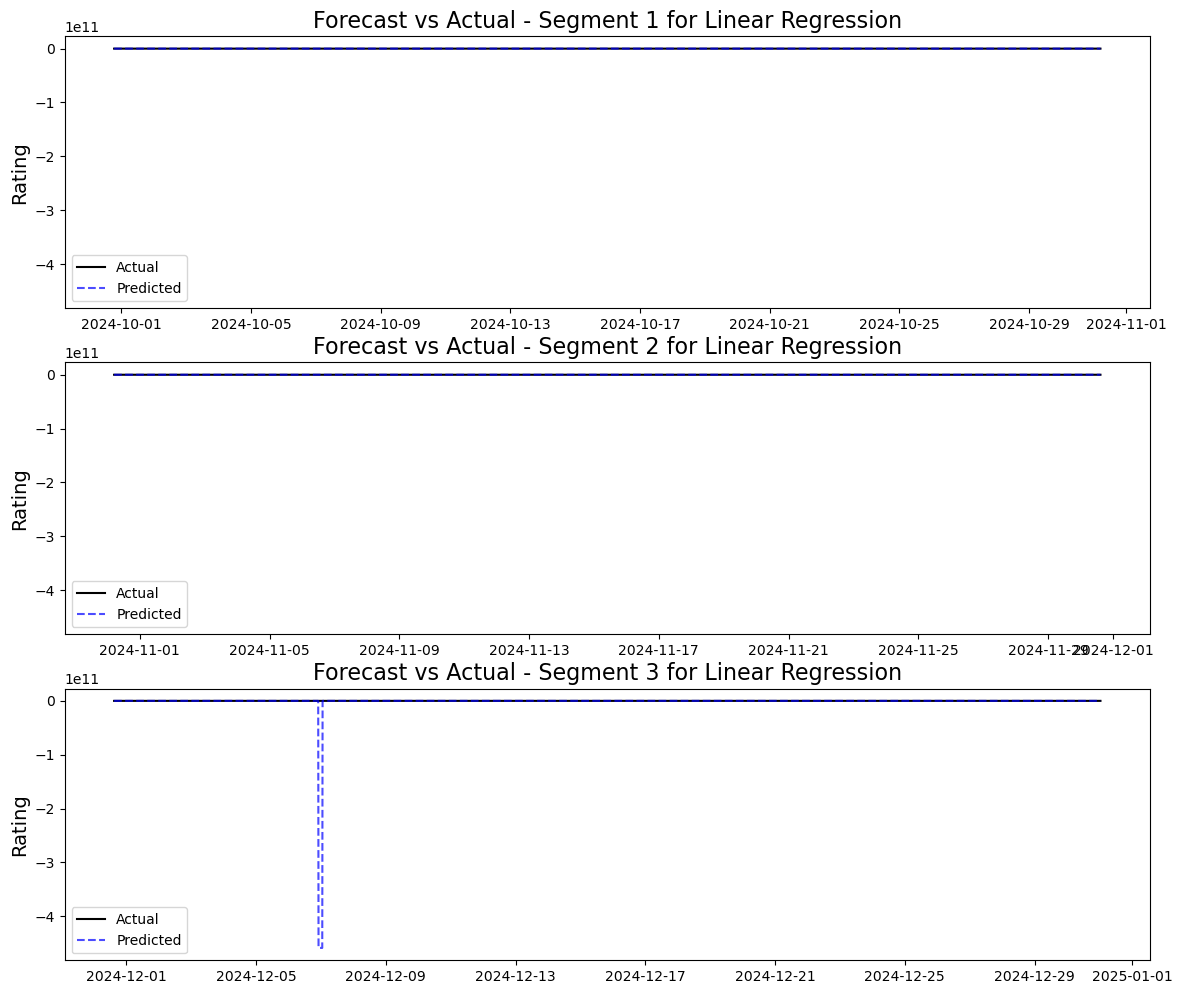

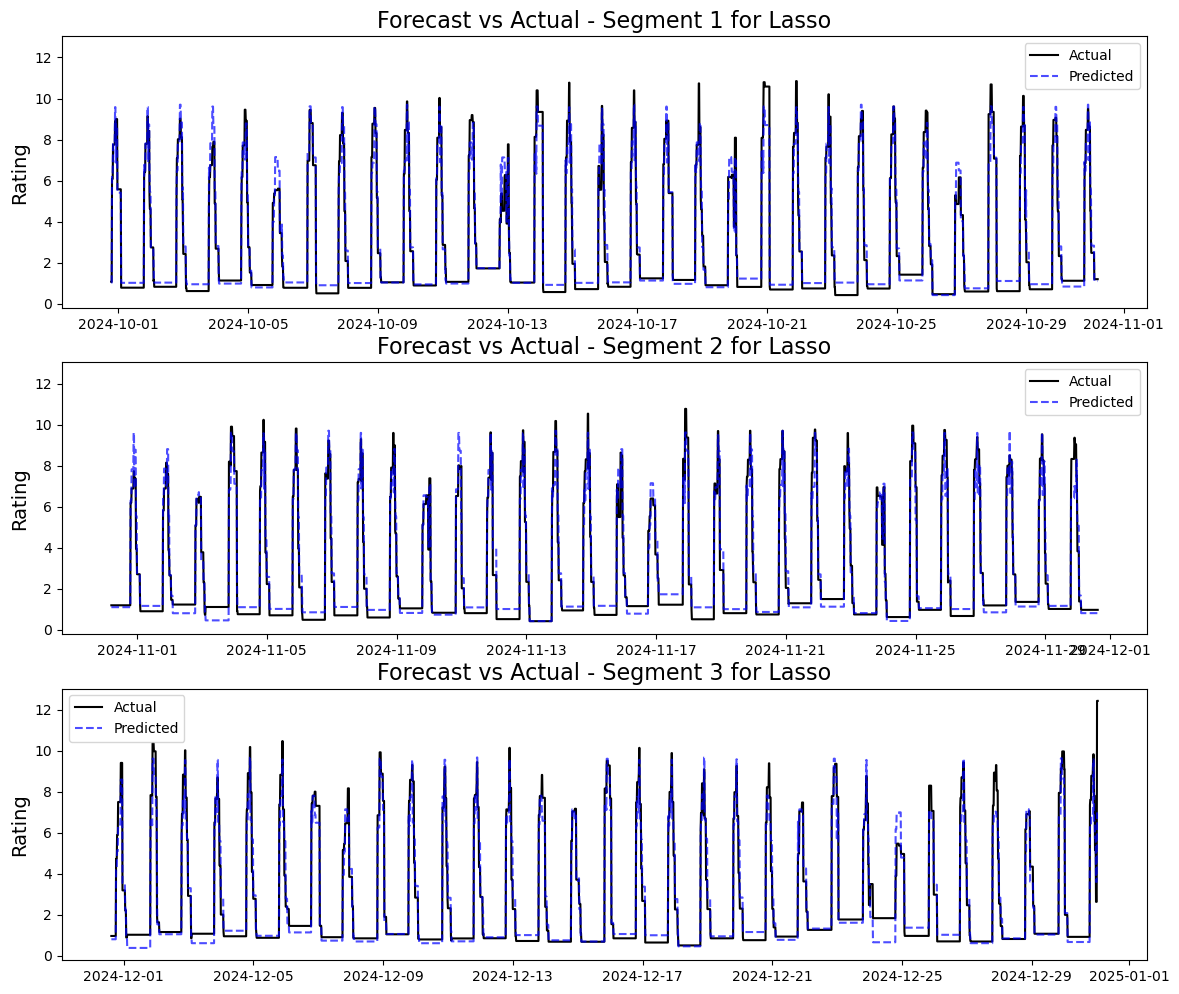

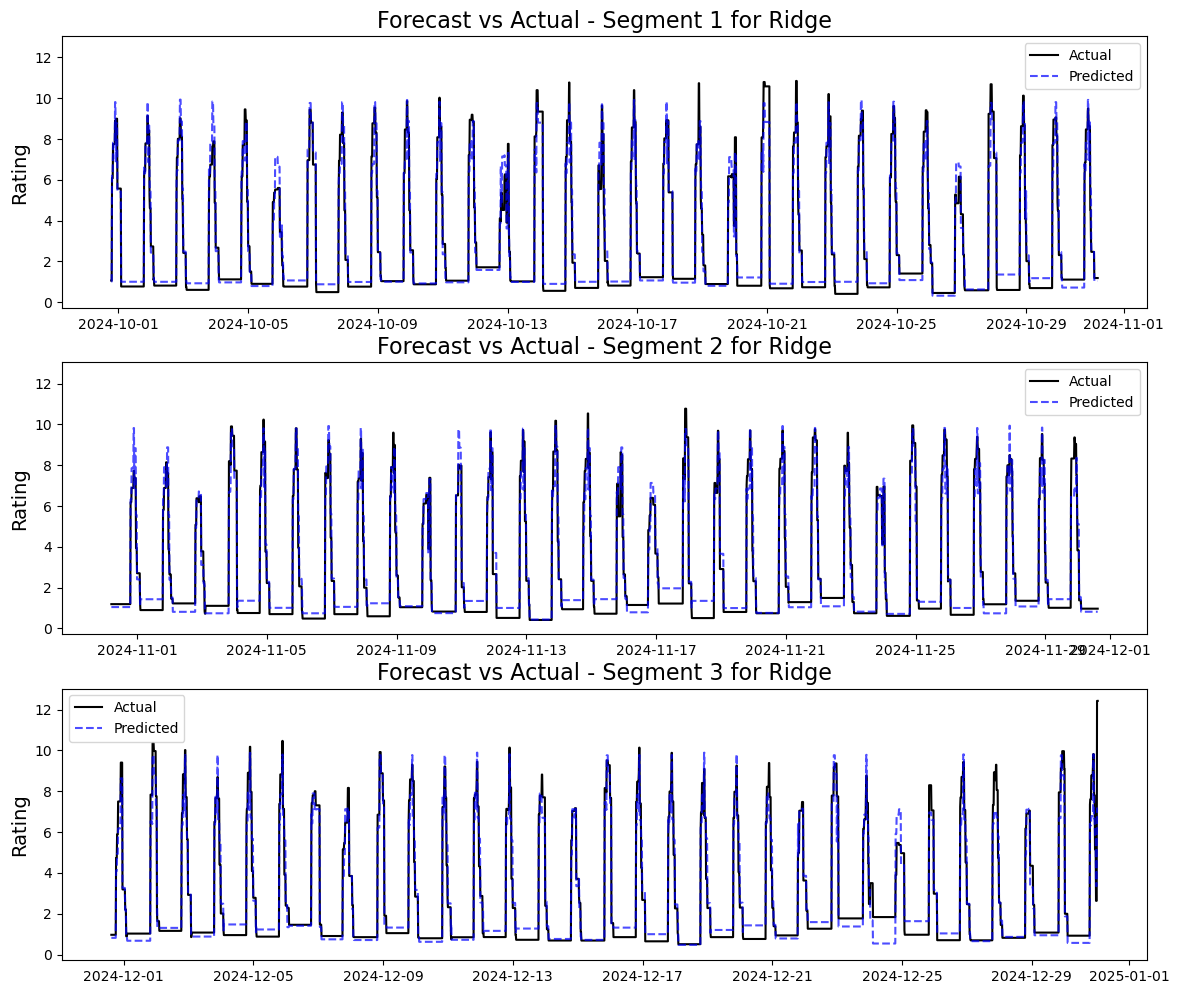

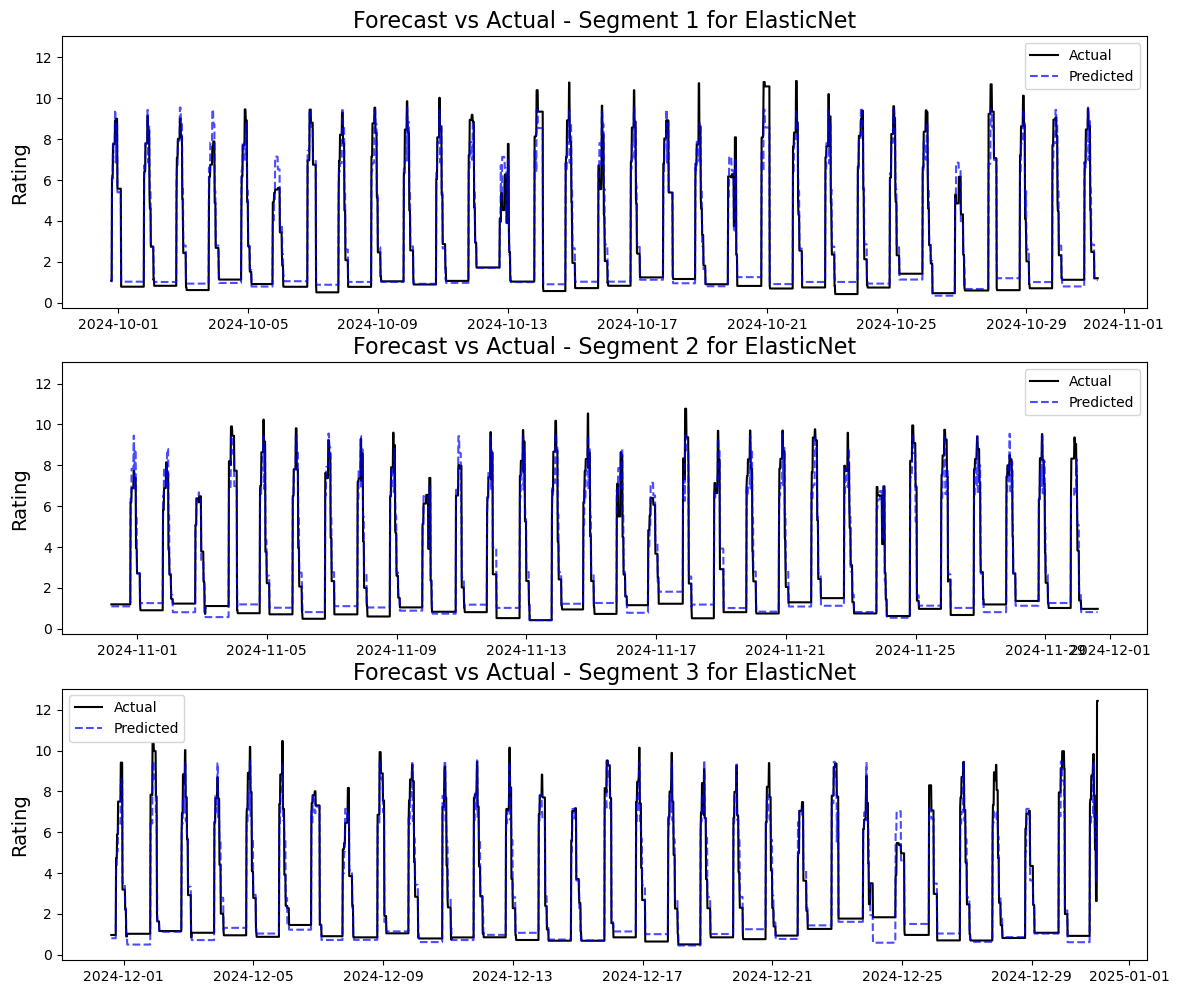

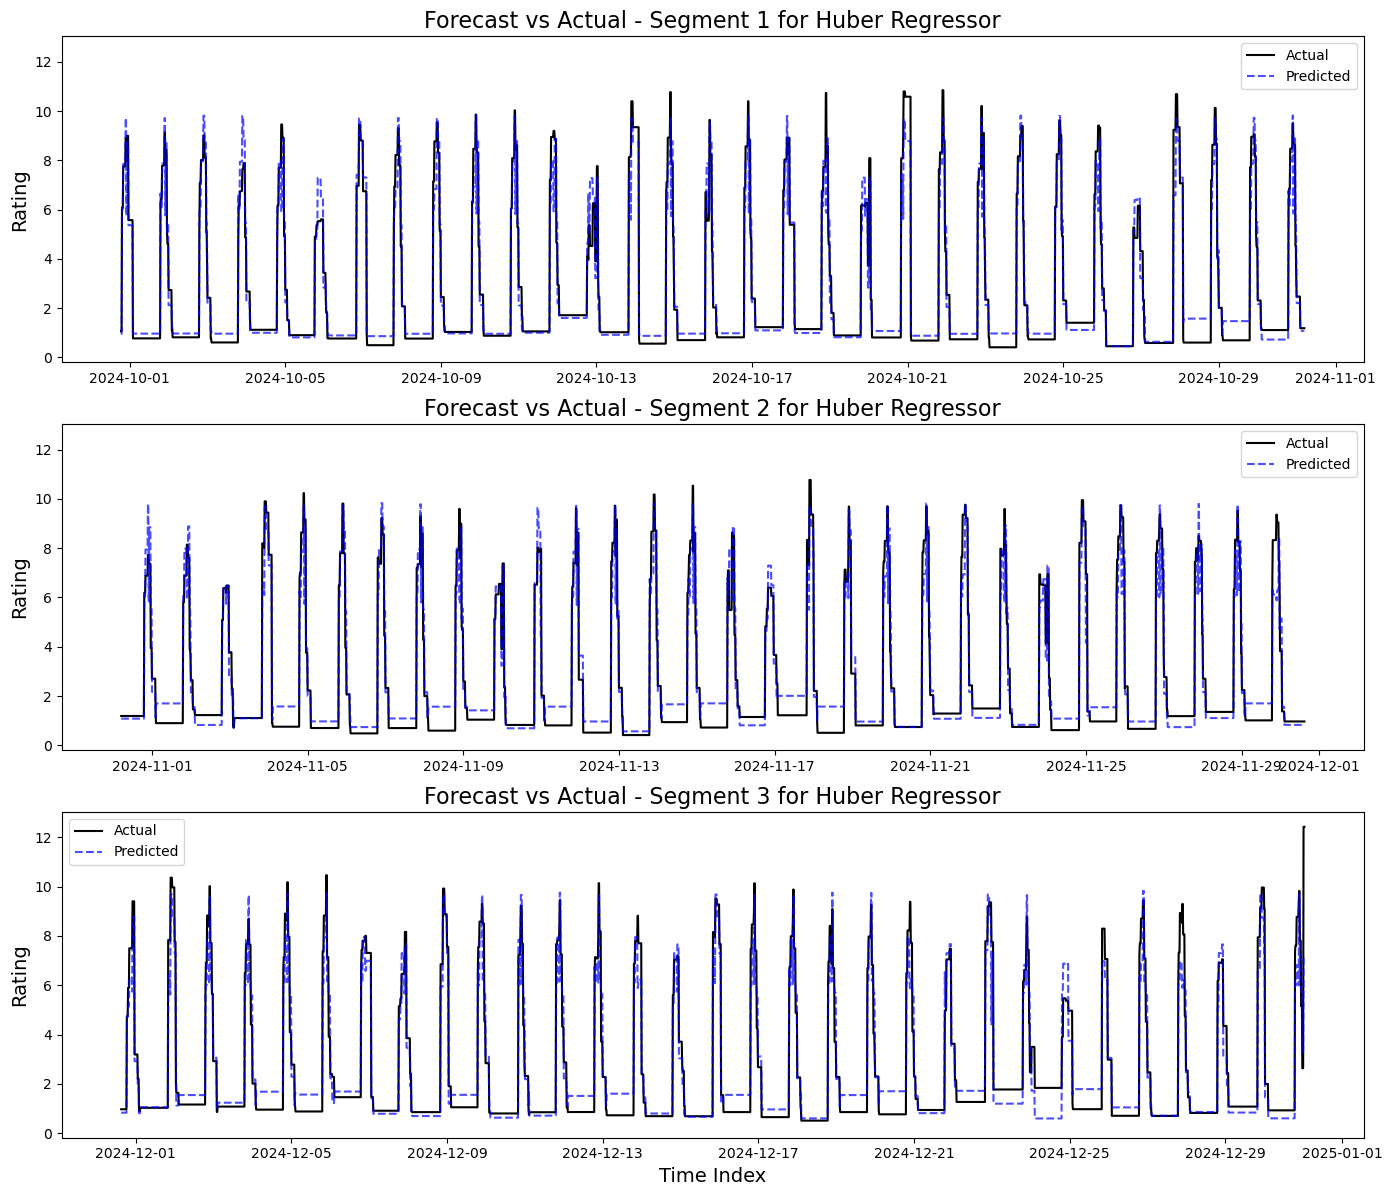

In [15]:
import matplotlib.pyplot as plt
import numpy as np

for name in models.keys():
    y_true = y_test
    y_pred = predictions[name]
    # Get time index (replace with your real datetime index if available)
    time_index = np.arange(len(y_true))

    # Split into 3 roughly equal parts
    n = len(y_true)
    splits = np.array_split(np.arange(n), 3)

    fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharey=True)
    for i, idx in enumerate(splits):
        axs[i].plot(y_test_index[idx], y_true[idx], label="Actual", color="black")
        axs[i].plot(y_test_index[idx], y_pred[idx], label="Predicted", color="blue", alpha=0.7, linestyle = "dashed")
        #axs[i].plot(y_test_index[idx], y_pred[idx], label="CV predictions", color="red", alpha=0.5, linestyle = "dashed")
        axs[i].set_title(f"Forecast vs Actual - Segment {i+1} for {name}")
        axs[i].set_ylabel("Rating")
        axs[i].legend()

axs[-1].set_xlabel("Time Index")
plt.tight_layout()
plt.show()